# A model for data

,39036,190788,309914,337062,370458,370781,403683,558945,575497,624360,680574
0,C,A,T,A,A,A,G,T,A,C,G
1,C,G,T,A,A,T,G,T,C,C,G
2,C,A,T,A,A,A,G,G,A,C,G
3,C,A,T,A,A,A,G,T,A,C,G
4,A,A,C,T,G,A,A,T,A,T,A
5,C,A,T,A,A,A,G,T,A,C,G
6,C,A,T,A,A,A,G,T,A,C,G
7,C,A,T,A,A,A,G,T,A,C,G
8,C,G,T,A,A,T,G,T,C,C,G
9,C,A,T,A,A,A,G,T,A,C,G


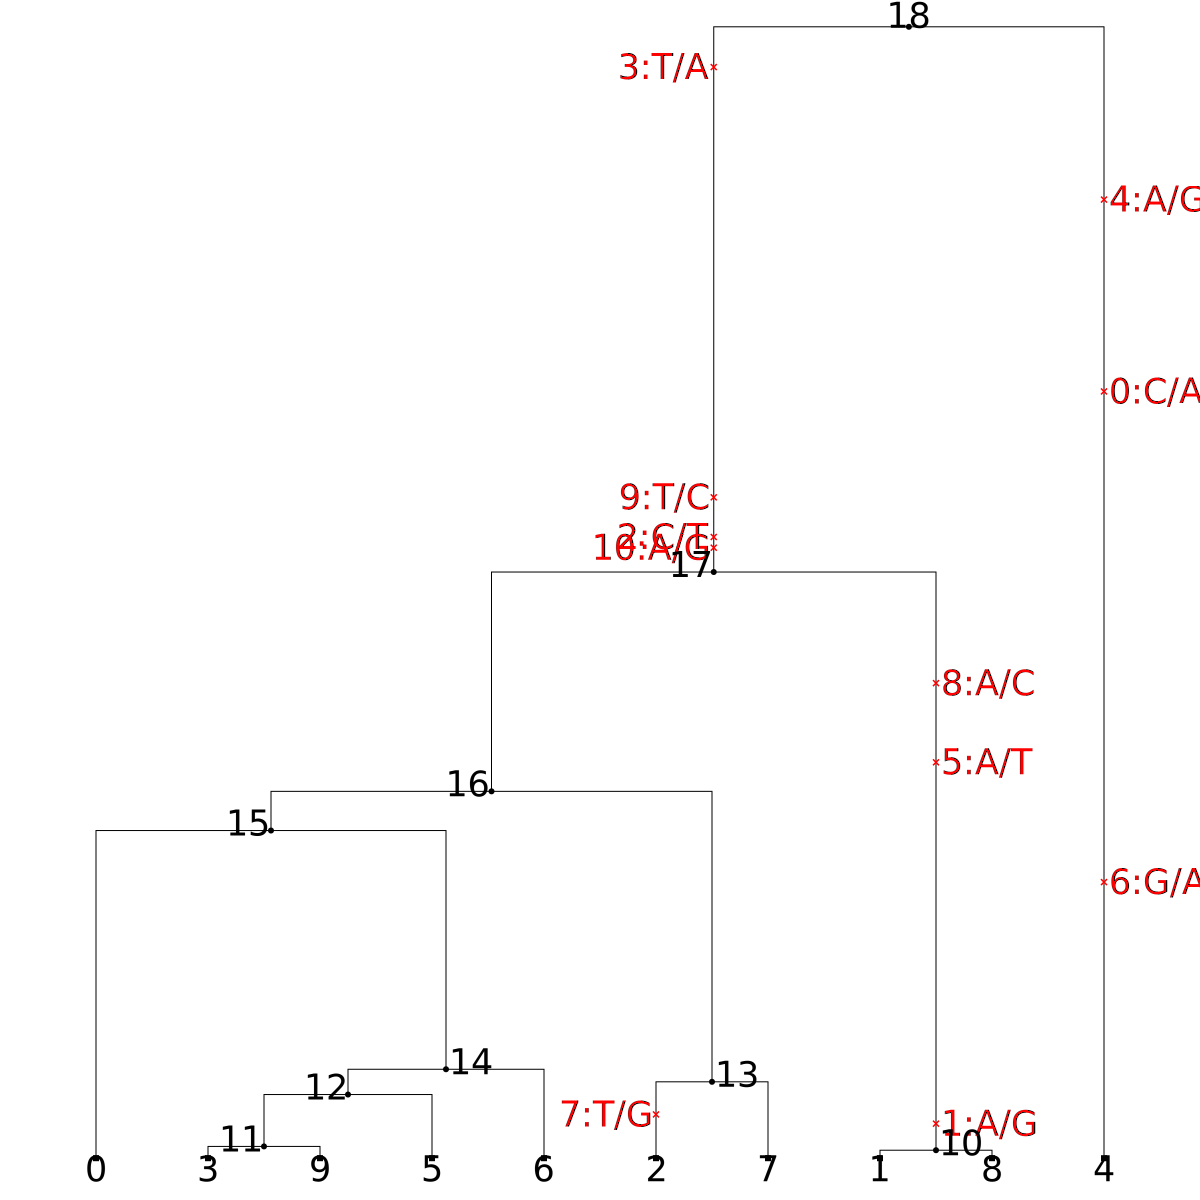

In [1]:
import msprime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import SVG
from myst_nb import glue


ts = msprime.sim_ancestry(
        10, ploidy=1, population_size=10000, random_seed=58185152, sequence_length=1e6, discrete_genome=True
    )
mutmodel = msprime.HKY(kappa=1.0)
ts = msprime.sim_mutations(ts, rate=0.02e-8, model=mutmodel, random_seed=512351, discrete_genome=True)

data = {}
mutlabels = {}
for v in ts.variants():
    states = []
    for x in v.genotypes:
        if x == 0:
            states.append(v.site.ancestral_state)
        else:
            states.append(v.site.mutations[0].derived_state)
    data[int(v.site.position)] = states
    mutlabels[v.site.mutations[0].id] = f"{int(v.site.id)}:{v.site.ancestral_state}/{v.site.mutations[0].derived_state}"

df = pd.DataFrame(data)
svg = ts.draw_svg(size=(1200, 1200), x_scale="treewise", x_axis=False, mutation_labels=mutlabels, style="text {font-size: 35px}", x_lim=[0, ts.sequence_length])

glue("variation_table_df", df, display=False)
glue("variation_table_tree", SVG(svg), display=False)

````{tabbed} The data
```{glue:figure} variation_table_df
:figwidth: 800
:name: "variation_table_df"
```
````

````{tabbed} The tree
```{glue:figure} variation_table_tree
:figwidth: 800
:name: "variation_table_tree"

The mutation label format (red) is `index:ancestral/derived`.
The index starts at 0 and refers to columns from the data tab.
```
````